<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Data%20Scraping%20w/%20Selenium%20%2B%20BS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 5 Metode Pengumpulan Data Digital
## Scraping Data pada Website Tokopedia

## Kelompok 5:
1. Monica Fanggidae - 2006464190
2. Muhammad Jauhar Hakim - 2006463982
3. Peksyaji - 2006522322
4. Yudistira Dwi Cahya - 2006530942

## Tekniks Pengerjaan :
1. Melakukan Scraping menggunakan Selenium dan BeautifulSoup di Local Computer
2. Melakukan olah data di Google Colab

## Daftar Isi
1. Scraping data produk dengan pembelian terbanyak
2. Scraping Story From the Heart (SFTH) KasKus
3. Scraping Ulasan Toko House of Cuff di Tokopedia
4. Scraping Ulasan Toko Erigo di Tokopedia

## 1. Scraping data produk dengan pembelian terbanyak

```python
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
print(driver)
driver.get("https://www.tokopedia.com/search?navsource=&ob=5&srp_component_id=04.06.00.00&srp_page_id=&srp_page_title=&st=&q=celana")

# Scroll down the webpage (adjust the number of scrolls as needed)
num_scrolls = 2
for _ in range(num_scrolls):
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
    driver.implicitly_wait(3)  # Wait for 3 seconds after each scroll

# lakukan web scraping
from bs4 import BeautifulSoup
halaman_parsed = BeautifulSoup(driver.page_source, 'html.parser')
target_element = halaman_parsed.find_all("div", class_="css-1asz3by")
print(target_element)
```

In [ ]:
!gdown 11IALoPzC6dCxibvDrss5gG_N_BtfRq7p

Downloading...
From: https://drive.google.com/uc?id=11IALoPzC6dCxibvDrss5gG_N_BtfRq7p
To: /content/output11.html
100% 1.54M/1.54M [00:00<00:00, 449MB/s]


In [ ]:
# Import Package
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pickle

In [ ]:
# Import HTML yang sudah discrapping dari local computer
with open("output11.html") as fp:
  output11 = BeautifulSoup(fp, 'html.parser')

target_element = output11.find_all("div", class_="css-1asz3by")
print(target_element)

[<div class="css-1asz3by"><a class="pcv3__info-content css-gwkf0u" href="https://ta.tokopedia.com/promo/v1/clicks/8a-xgVY2gmUEHsJa6_UOHs1dbm-xgVY789CBUstpbm-FQRo2PcB5QiUEHZFiPcBWgZUEH_rhHAeNoAKFHZFiqfuNPfYagVY2gmUEoArfo_rfH_epHaFiy3zwrfo5rM1i6sURoidOHprpHAnNHsUFopehoaFirpowQcYSUstig9BGqMzUZMggQj2fgAo6QJBkQfBoe7BpZ3O6HcoD692qu7gN3_-Sq1Y2Z92HqBBd_Oz0P7Y1u9Poqjja_32zHJNAZ9o-Q9zDguxjPMoW1MgsHjNfyfOuq1Y2Z9BHqBjp_Bo-r7BWo9giQ1NDZ325q1NE_MWoQ177_S20PJNWuMOoepnF332-P7h9z_zquOV73_-uHO2WzMWgu7BE_1PZQ1B2PfBiH72F3s-DPuKa1MhszsBF3jo-ojBke3BHe72fyfODQMV9o3gsZJ2f3jx3qMzc69Cqe7jfZ32Cq1hAZSgsQ3hXyurOgMHaqIgszsBF3jo-ojBke3BHe72dgVP383u36_CgufzEZ325q1B2PfBsHjNfyfO3gBBXZSgjH7NDZ325q1OAZ9o-QjNkysoGQVKp_Mhg3J2ky1o-ojBkZ_o6q_eh_92s8jOJe_uoqjBR_S2z8JNNZsjibm-Orfua9fBjUstiHmUDUSoBrRo2QfNwq3ei6i-91uzhrRVg8A1aPMV1qjydrMxs_B-EuM2N_B2OQfosrJxSosVyusChHAghZ7uGPcxj1jUOoBYag9xfZ1zfyugDHV2wg_u2PsVG6I2bgJgfHMo7yOYFuOoF97u2u7ugQRHNyOuNZcrWou2SyOxa_V1NzfPz1M-6r9C-qArazjW71ZUDUMVDgaUEUMW79fudy3o7UiFiQSuWyMua9fYM9fVjraUEHZ

In [ ]:
#Judul Produk
target_element[15].find_all("a")[0]['title']

'Celana Unisex Erigo Chino Pants Alexa Katun Navy'

In [ ]:
#Link Produk
target_element[15].find_all("a")[0]['href']

'https://www.tokopedia.com/erigo/celana-unisex-erigo-chino-pants-alexa-katun-navy-36?extParam=ivf%3Dtrue%26src%3Dsearch'

In [ ]:
#Campaign Produk
target_element[15].find_all('div', {'class':'css-6zf22r'})[0].get_text()

'Ramadan Ekstra'

In [ ]:
#Nama Produk Alternatif
target_element[15].find_all('div', {'class':'prd_link-product-name css-3um8ox'})[0].get_text()

'Celana Unisex Erigo Chino Pants Alexa Katun Navy'

In [ ]:
#Harga Produk Sebelum Diskon
target_element[15].find_all('div', {'class':'prd_label-product-slash-price css-xfl72w'})[0].get_text()

'Rp500.000'

In [ ]:
#Harga Produk Setelah diskon
target_element[15].find_all('div', {'class':'prd_link-product-price css-h66vau'})[0].get_text()

'Rp129.000'

In [ ]:
#Diskon Produk
target_element[15].find_all('div', {'class':'prd_badge-product-discount css-1xelcdh'})[0].get_text()

'74%'

In [ ]:
#Cashback Produk
target_element[15].find_all('div', {'class':'prd_label-product-price css-tolj34'})[0].get_text()

'Cashback 5,1rb'

In [ ]:
#Rating Produk
target_element[15].find_all('span', {'class':'prd_rating-average-text css-t70v7i'})[0].get_text()

'4.9'

In [ ]:
#Banyak Produk Terjual
target_element[15].find_all('span', {'class':'prd_label-integrity css-1sgek4h'})[0].get_text()

'10rb+ terjual'

In [ ]:
#Nama Toko
target_element[15].find_all('span', {'class':'prd_link-shop-name css-1kdc32b flip'})[0].get_text()

'Erigo Official'

In [ ]:
#Lokasi Toko
target_element[15].find_all('span', {'class':'prd_link-shop-loc css-1kdc32b flip'})[0].get_text()

'Kab. Tangerang'

In [ ]:
def get_title():
  if row.find_all("a")[0]['title'] is not None:
    return row.find_all("a")[0]['title']
  else:
    return np.nan

def get_link():
  if row.find_all("a")[0]['href'] is not None:
    return row.find_all("a")[0]['href']
  else:
    return np.nan

def get_campaign():
  if row.find_all('div', {'class':'css-6zf22r'}) != []:
    return row.find_all('div', {'class':'css-6zf22r'})[0].get_text()
  else:
    return np.nan

def get_product_name():
  if row.find_all('div', {'class':'prd_link-product-name css-3um8ox'})[0].get_text() is not None:
    return row.find_all('div', {'class':'prd_link-product-name css-3um8ox'})[0].get_text()
  else:
    return np.nan

def get_before_price():
  if row.find_all('div', {'class':'prd_label-product-slash-price css-xfl72w'}) != []:
    return row.find_all('div', {'class':'prd_label-product-slash-price css-xfl72w'})[0].get_text()
  else:
    return np.nan

def get_after_price():
  if row.find_all('div', {'class':'prd_link-product-price css-h66vau'})[0].get_text() is not None:
    return row.find_all('div', {'class':'prd_link-product-price css-h66vau'})[0].get_text()
  else:
    return np.nan

def get_discount():
  if row.find_all('div', {'class':'prd_badge-product-discount css-1xelcdh'}) != []:
    return row.find_all('div', {'class':'prd_badge-product-discount css-1xelcdh'})[0].get_text()
  else:
    return np.nan

def get_cashback():
  if row.find_all('div', {'class':'prd_label-product-price css-tolj34'}) != []:
    return row.find_all('div', {'class':'prd_label-product-price css-tolj34'})[0].get_text()
  else:
    return np.nan

def get_rating():
  if row.find_all('span', {'class':'prd_rating-average-text css-t70v7i'})[0].get_text() is not None:
    return row.find_all('span', {'class':'prd_rating-average-text css-t70v7i'})[0].get_text()
  else:
    return np.nan

def get_sold_amount():
  if row.find_all('span', {'class':'prd_label-integrity css-1sgek4h'})[0].get_text() is not None:
    return row.find_all('span', {'class':'prd_label-integrity css-1sgek4h'})[0].get_text()
  else:
    return np.nan

def get_shop_name():
  if row.find_all('span', {'class':'prd_link-shop-name css-1kdc32b flip'}) != []:
    return row.find_all('span', {'class':'prd_link-shop-name css-1kdc32b flip'})[0].get_text()
  else:
    return np.nan

def get_shop_location():
  if row.find_all('span', {'class':'prd_link-shop-loc css-1kdc32b flip'}) != []:
    return row.find_all('span', {'class':'prd_link-shop-loc css-1kdc32b flip'})[0].get_text()
  else:
    return np.nan

In [ ]:
df = pd.DataFrame(columns=["Judul","Link","Campaign","Nama Produk",
                           "Harga Sebelum Diskon","Harga Setelah Diskon",
                           "Diskon","Cashback","Rating","Banyak Terjual",
                           "Nama Toko","Lokasi Toko"])
for row in target_element:
    data_dict = {"Judul": get_title(),
                 "Link": get_link(),
                 "Campaign": get_campaign(),
                 "Nama Produk": get_product_name(),
                 "Harga Sebelum Diskon": get_before_price(),
                 "Harga Setelah Diskon": get_after_price(),
                 "Diskon": get_discount(),
                 "Cashback": get_cashback(),
                 "Rating": get_rating(),
                 "Banyak Terjual": get_sold_amount(),
                 "Nama Toko": get_shop_name(),
                 "Lokasi Toko": get_shop_location()}
    df1 = pd.DataFrame(data_dict, index=[0])
    df = pd.concat([df,df1], ignore_index=True)

In [ ]:
df

,Judul,Link,Campaign,Nama Produk,Harga Sebelum Diskon,Harga Setelah Diskon,Diskon,Cashback,Rating,Banyak Terjual,Nama Toko,Lokasi Toko
0,Houseofcuff Celana Panjang Chino Regular Krem ...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,NaN,Houseofcuff Celana Panjang Chino Regular Krem ...,Rp280.000,Rp175.000,38%,NaN,4.9,40+ terjual,NaN,NaN
1,Houseofcuff Celana Panjang Chino Regular - Ab...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,NaN,Houseofcuff Celana Panjang Chino Regular - Ab...,Rp280.000,Rp175.000,38%,NaN,4.7,60+ terjual,NaN,NaN
2,Houseofcuff Celana Panjang Chino Regular Hitam...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,NaN,Houseofcuff Celana Panjang Chino Regular Hitam...,Rp280.000,Rp175.000,38%,NaN,4.5,40+ terjual,NaN,NaN
3,Celana Chino Panjang Pria Civity Original - Hi...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,NaN,Celana Chino Panjang Pria Civity Original - Hi...,Rp134.800,Rp119.800,11%,"Cashback 13,1rb",4.9,5rb+ terjual,Civity,Bandung
4,Celana Unisex Erigo Chino Pants Sirius Black,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,Ramadan Ekstra,Celana Unisex Erigo Chino Pants Sirius Black,Rp500.000,Rp129.000,74%,"Cashback 5,1rb",4.9,50rb+ terjual,Erigo Official,Kab. Tangerang
5,[RANDOM] Victoria&#39;s Secret Panty Underwear...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,NaN,[RANDOM] Victoria's Secret Panty Underwear Cel...,NaN,Rp119.000,NaN,"Cashback 16,6rb",4.8,13 terjual,desiree,Jakarta Pusat
6,Wowon Men Boxer - Celana Dalam Pria - Zero Gra...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,NaN,Wowon Men Boxer - Celana Dalam Pria - Zero Gra...,NaN,Rp99.999,NaN,"Cashback 13,9rb",4.9,5rb+ terjual,WowonOfficial,Jakarta Barat
7,GT MAN - GMX CELANA DALAM KARET - 3PC - MULTIC...,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,NaN,GT MAN - GMX CELANA DALAM KARET - 3PC - MULTIC...,Rp82.000,Rp57.600,30%,"Cashback 2,8rb",4.9,5rb+ terjual,GTMan Official,Jakarta Utara
8,Celana Unisex Erigo Chino Pants Sirius Black,https://www.tokopedia.com/erigo/celana-unisex-...,Ramadan Ekstra,Celana Unisex Erigo Chino Pants Sirius Black,Rp500.000,Rp129.000,74%,"Cashback 5,1rb",4.9,50rb+ terjual,Erigo Official,Kab. Tangerang
9,celana pendek pria/wanita santai,https://www.tokopedia.com/adhinataku/celana-pe...,NaN,celana pendek pria/wanita santai,NaN,Rp14.500,NaN,NaN,4.8,10rb+ terjual,adhinataku,Jakarta Pusat


## 2. Scraping Story From the Heart (SFTH) KasKus

In [ ]:
#Prepare Selenium dan Chromedriver
!apt-get update > /dev/null

!apt-get install chromium-chromedriver > /dev/null

!pip install selenium > /dev/null

In [ ]:
#Import Library yang diperlukan
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
#Menyiapkan webdriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)

In [ ]:
#Url dan pengecekan apakah driver dapat bekerja
url = "https://www.kaskus.co.id/komunitas/51/stories-from-the-heart?tab=threads&sort=popular"
driver.get(url)
print(driver.title)

Stories from the Heart - Forum | KASKUS


In [ ]:
#Menggunakan selenium untuk me-"parse" html
soup = BeautifulSoup(driver.page_source, "html.parser")
print(soup)

<html class="light" lang="id" style="color-scheme: light;"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=5c7f724541705e9be40f61685227e166"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-2X63986BYE&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-C844D7RQ3B&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-VGYN4YNP7Y&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-8EE2M7D4GJ&amp;l=dataLayer&amp;cx=c

In [ ]:
#Mencari bagian hrml yang diinginkan
pond = soup.findAll('div', attrs = {'class':'flex w-full flex-col justify-between bg-white px-4 py-3 dark:bg-grey-7 mb-2'})

In [ ]:
print(pond)

[<div class="flex w-full flex-col justify-between bg-white px-4 py-3 dark:bg-grey-7 mb-2"><div class="mb-2 flex items-center justify-between text-xs"><div class="flex items-center"><a class="font-medium text-secondary dark:text-secondary-night" href="/profile/592757?ref=threadlist-51&amp;med=thread_list" title="diosetta"><div class="htmlContentRenderer_html-content___EjM3">diosetta</div></a><div class="ml-1 text-primary dark:text-primary-night">•</div><div class="ml-1 text-tertiary dark:text-tertiary-night">26-01-2024 11:09</div></div><div class="flex items-center"><div class="relative"><i class="icon_icon__yxYJh h-5 w-5 text-base fa fa-ellipsis-vertical font-light cursor-pointer pl-2 text-secondary dark:text-secondary-night"></i></div></div></div><div class="mb-2 block flex-1 text-lg font-medium visited:text-tertiary dark:visited:text-tertiary-night"><a class="inline break-words align-middle" href="/thread/65b392ccee4bf919a83080f6/pasak-rumah-tumbal?ref=threadlist-51&amp;med=thread_li

In [ ]:
#Mempersiapkan Feature
Judul = []
Author = []
Views = []
Cmnt = []
Likes = []

In [ ]:
#Melakukan scraping data yang diinginkan
for story in pond:
    titles = story.find('a', attrs = {'class':'inline break-words align-middle'}).text          #Mengambil data judul
    auth = story.find('div', attrs = {'class':'htmlContentRenderer_html-content___EjM3'}).text  #Mengambil nama author
    view = story.find('div', attrs = {'class':'ml-2 flex items-center'}).text                   #Mengambil jumlah views
    cmnt = story.find('div', attrs = {'class':'ml-2 flex cursor-pointer items-center'}).text    #Mengambil jumlah comment
    like = story.select_one('div.flex.items-center > div.text-xs').text                         #Mengambil jumlah like
    print(titles, auth, like, cmnt)  #agar mudah dimonitor apakah proses berjalan dengan baik atau tidak

    Judul.append(titles) #Menambahkan ke feature Judul
    Author.append(auth)  #Menambahkan ke feature Author
    Views.append(view)   #Menambahkan ke feature Views
    Cmnt.append(cmnt)    #Menambahkan ke feature Comment
    Likes.append(like)   #Menambahkan ke feature Likes

df_sfth = pd.DataFrame({"Judul": Judul, "Author": Author, "Views" : Views, "Komentar" : Cmnt, "Likes" : Likes}) #Menyimpan data ke bentuk dataframe

PASAK RUMAH TUMBAL diosetta 22 36
ALAM LELEMBUT [Petualangan Mas Drag Dan Slamet Penceng] indrag057 363 26.3K
HITAM Season 2 Mbahjoyo911 366 24.9K
TAMAT - [Reborn]Takdir Yang Tidak Bisa Ku Lawan [Horor Kisah Nyata] theperegrinefal 62 6.9K
Index Lengkap Ribuan Cerita Horror SFTH 🔥 dvayya 56 118
A Man and The Lady robotpintar 175 2.2K
GW BERTEMAN DENGAN KOLONG WEWE (CHAPTER 3 / FINAL CHAPTER) juraganpengki 115 8K
" kisah seorang marinir - (life,horror) BASED ON TRUE STORY Debby33 48 1.9K
REAL HOROR STORY "Rel Kereta Api Angker" tyazscream 102 10K
AM.PM robotpintar 197 1.8K
Surga Bernama Neraka... londo.046 19 6.5K
Penghianatan Jin Leluhur afryan015 27 167
[TAMAT] Dia... Dia... Dia... Sempurna (Reborn) stress.sarap 93 3.6K
Cerita-Cerita Horor Berdasarkan Kisah Nyata bumibulat123 84 216
Istri Tetangga Yang Menantang enjihalala25 42 7.8K
Sometimes Love Just Ain't Enough jayanagari 6 1.5K
Surga Hari Ini, Neraka Esok Hari... londo.046 93 10K
Kesucianku Hilang Di Tempat Kerja (21+) afryan015 3

In [ ]:
#Melihat berapa banyak data yang bisa kita dapatkan
df_sfth.shape

(20, 5)

In [ ]:
df_sfth

,Judul,Author,Views,Komentar,Likes
0,PASAK RUMAH TUMBAL,diosetta,5.3K,36,22
1,ALAM LELEMBUT [Petualangan Mas Drag Dan Slamet...,indrag057,779.4K,26.3K,363
2,HITAM Season 2,Mbahjoyo911,1.5M,24.9K,366
3,TAMAT - [Reborn]Takdir Yang Tidak Bisa Ku Lawa...,theperegrinefal,2.8M,6.9K,62
4,Index Lengkap Ribuan Cerita Horror SFTH 🔥,dvayya,27.9K,118,56
5,A Man and The Lady,robotpintar,257.5K,2.2K,175
6,GW BERTEMAN DENGAN KOLONG WEWE (CHAPTER 3 / FI...,juraganpengki,2.1M,8K,115
7,""" kisah seorang marinir - (life,horror) BASED ...",Debby33,973.8K,1.9K,48
8,"REAL HOROR STORY ""Rel Kereta Api Angker""",tyazscream,3.7M,10K,102
9,AM.PM,robotpintar,303.8K,1.8K,197


In [ ]:
df_sfth.head(10)

,Judul,Author,Views,Komentar,Likes
0,PASAK RUMAH TUMBAL,diosetta,5.3K,36,22
1,ALAM LELEMBUT [Petualangan Mas Drag Dan Slamet...,indrag057,779.4K,26.3K,363
2,HITAM Season 2,Mbahjoyo911,1.5M,24.9K,366
3,TAMAT - [Reborn]Takdir Yang Tidak Bisa Ku Lawa...,theperegrinefal,2.8M,6.9K,62
4,Index Lengkap Ribuan Cerita Horror SFTH 🔥,dvayya,27.9K,118,56
5,A Man and The Lady,robotpintar,257.5K,2.2K,175
6,GW BERTEMAN DENGAN KOLONG WEWE (CHAPTER 3 / FI...,juraganpengki,2.1M,8K,115
7,""" kisah seorang marinir - (life,horror) BASED ...",Debby33,973.8K,1.9K,48
8,"REAL HOROR STORY ""Rel Kereta Api Angker""",tyazscream,3.7M,10K,102
9,AM.PM,robotpintar,303.8K,1.8K,197


##3. Scraping Ulasan Toko House of Cuff di Tokopedia

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import pandas as pd

url = input("Masukkan url toko : ")

if url :
    options = webdriver.ChromeOptions()
    options.add_argument("--start-maximized")
    driver = webdriver.Chrome(options=options)
    driver.get(url)

    data = []
    for i in range(0, 50):    # Mengambil data ulasan dari 50 halaman ulasan
        soup = BeautifulSoup(driver.page_source, "html.parser")
        containers = soup.findAll('article', attrs = {'class':'css-ccpe8t'})

        for container in containers:
            try:
                review = container.find('span', attrs = {'data-testid':'lblItemUlasan'}).text
                data.append(
                    (review)
                )
            except AttributeError:
                continue

        time.sleep(2)
        driver.find_element(By.CSS_SELECTOR, "button[aria-label^='Laman berikutnya']").click()
        time.sleep(3)

    print(data)
    df = pd.DataFrame(data, columns=["Ulasan"])
    df.to_csv("Tokopedia.csv", index=False)

Hasil scraping

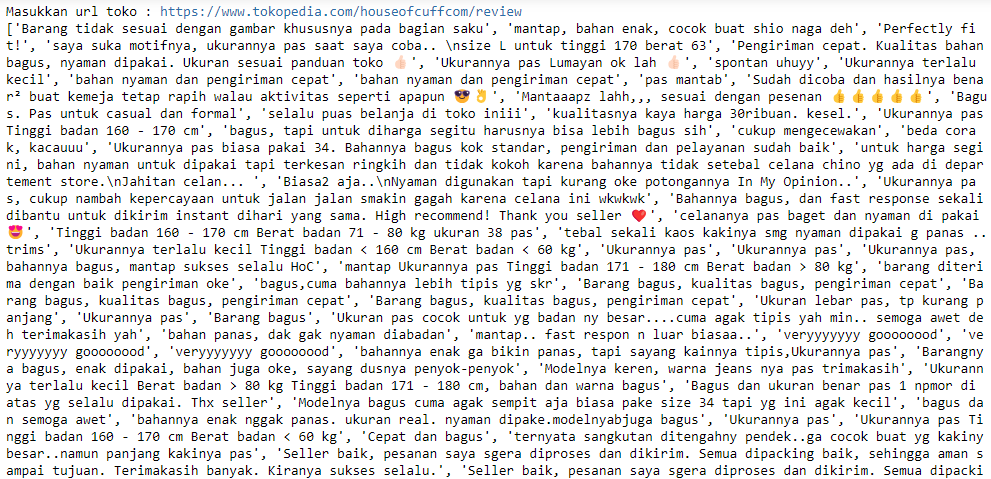

In [ ]:
import pandas as pd

In [ ]:
# Membaca dataframe hasil scraping
df_HC = pd.read_csv('https://raw.githubusercontent.com/Peksyaji/Scraping-Ulasan-Tokopedia/main/Tokopedia.csv')
df_HC

,Ulasan
0,Barang tidak sesuai dengan gambar khususnya pa...
1,"mantap, bahan enak, cocok buat shio naga deh"
2,Perfectly fit!
3,"saya suka motifnya, ukurannya pas saat saya co..."
4,"Pengiriman cepat. Kualitas bahan bagus, nyaman..."
...,...
463,"ada kesalahan ukuran pada 1 celana, sayang sekali"
464,"ada kesalahan ukuran pada 1 celana, sayang sekali"
465,"Modelnya bagus banget, sesuai banget sama yang..."
466,Gokil ga tuh 🔥 gw percayain Houseofcuff utk pr...


##4. Scraping Review Product Erigo di Tokopedia

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import pandas as pd

url = input("Masukkan url toko : ")

if url :
    options = webdriver.ChromeOptions()
    options.add_argument("--start-maximized")
    driver = webdriver.Chrome(options=options)
    driver.get(url)

    data = []
    for i in range(0, 50):    # Mengambil data ulasan dari 50 halaman ulasan
        soup = BeautifulSoup(driver.page_source, "html.parser")
        containers = soup.findAll('article', attrs = {'class':'css-ccpe8t'})

        for container in containers:
            try:
                review = container.find('span', attrs = {'data-testid':'lblItemUlasan'}).text
                data.append(
                    (review)
                )
            except AttributeError:
                continue

        time.sleep(2)
        driver.find_element(By.CSS_SELECTOR, "button[aria-label^='Laman berikutnya']").click()
        time.sleep(3)

    print(data)
    df = pd.DataFrame(data, columns=["Ulasan"])
    df.to_csv("Tokopedia.csv", index=False)

Hasil Scraping Review Product Erigo di Tokopedia
/Users/monicatantris/PycharmProjects/pythonProject1/.venv/bin/python /Users/monicatantris/PycharmProjects/pythonProject1/TOKPED.py
Masukkan url toko : https://www.tokopedia.com/erigo/review
10
[<article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/kemeja-pria-erigo-koko-short-sleeve-bordir-zafar-blue"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://images.tokopedia.net/img/cache/200-square/hDjmkQ/2024/3/14/6cc5dab8-8a4e-4be5-a0bc-173afb0c05ba.jpg.webp?ect=4g"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Kemeja Pria Erigo Koko Short Sleeve Bordir Zafar Blue</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: XL</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 5" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://accounts.tokopedia.com/image/v1/u/10172537/user_thumbnail/desktop?ect=4g"/></div><span class="name">Bima</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">bahannya sesuai sama yang saya suka
ukurannya juga pas</span></p><div class="css-1241z5s"></div><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button><button aria-pressed="false" class="css-1r7fpvs" type="button"><span>Lihat Balasan</span><svg class="unf-icon css-1375h5i" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path d="M12 15.25a.74.74 0 01-.53-.22l-5-5A.75.75 0 017.53 9L12 13.44 16.47 9a.75.75 0 011.06 1l-5 5a.74.74 0 01-.53.25z"></path></svg></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/kemeja-pria-erigo-koko-short-sleeve-basic-faiz-off-white"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://images.tokopedia.net/img/cache/200-square/hDjmkQ/2024/3/14/1b1ced2c-bc9c-4f7d-bfed-42b8527beddb.jpg.webp?ect=4g"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Kemeja Pria Erigo Koko Short Sleeve Basic Faiz Off White</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: L</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 3" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://images.tokopedia.net/img/cache/100-square/default_v3-usrnophoto.png.webp?ect=4g"/></div><span class="name">F***a</span></div><p class="css-lw118z-unf-heading e1qvo2ff8" color="var(--NN400, #AAB4C8)" data-unify="Typography"></p><div class="css-1241z5s"></div><p class="css-zhjnk4-unf-heading e1qvo2ff8" data-unify="Typography">Kendala: Tidak lengkap/salah kirim</p><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/kemeja-unisex-erigo-shanghai-longsleeve-venlo-navy"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://images.tokopedia.net/img/cache/200-square/VqbcmM/2024/2/20/9fd54436-ff9b-4bfe-acf8-3a9494b3497f.jpg.webp?ect=4g"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Kemeja Unisex Erigo Shanghai Longsleeve Venlo Navy</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: XL</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 5" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://accounts.tokopedia.com/image/v1/u/4499722/user_thumbnail/desktop?ect=4g"/></div><span class="name">Indra</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">Bahannya bagus ukuran sesuai</span></p><div class="css-1241z5s"></div><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button><button aria-pressed="false" class="css-1r7fpvs" type="button"><span>Lihat Balasan</span><svg class="unf-icon css-1375h5i" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path d="M12 15.25a.74.74 0 01-.53-.22l-5-5A.75.75 0 017.53 9L12 13.44 16.47 9a.75.75 0 011.06 1l-5 5a.74.74 0 01-.53.25z"></path></svg></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/kemeja-unisex-erigo-shanghai-longsleeve-fernie-white"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://images.tokopedia.net/img/cache/200-square/hDjmkQ/2024/3/14/c5d8597d-e68b-47bc-b482-f0ee972dc70d.jpg.webp?ect=4g"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Kemeja Unisex Erigo Shanghai Longsleeve Fernie White</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: XL</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 5" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://accounts.tokopedia.com/image/v1/u/224894509/user_thumbnail/desktop?ect=4g"/></div><span class="name">Rian</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">Ukurannya pas Tinggi badan 160 - 170 cm Berat badan &gt; 80 kg

bahanya adem..selerny responsip..mantap</span></p><div class="css-1241z5s"><button class="css-1wwq0oy" type="button"><div class="css-bqlp8e intrinsic"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2764%27 height=%2764%27/%3e"/></span><img alt="foto review produk 1" class="css-1c345mg" crossorigin="anonymous" data-testid="imgItemPhotoulasan" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div></button><button class="css-1wwq0oy" type="button"><div class="css-bqlp8e intrinsic"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2764%27 height=%2764%27/%3e"/></span><img alt="foto review produk 2" class="css-1c345mg" crossorigin="anonymous" data-testid="imgItemPhotoulasan" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div></button></div><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button><button aria-pressed="false" class="css-1r7fpvs" type="button"><span>Lihat Balasan</span><svg class="unf-icon css-1375h5i" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path d="M12 15.25a.74.74 0 01-.53-.22l-5-5A.75.75 0 017.53 9L12 13.44 16.47 9a.75.75 0 011.06 1l-5 5a.74.74 0 01-.53.25z"></path></svg></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/kemeja-pria-erigo-koko-long-sleeve-bordir-dayyan-blue"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Kemeja Pria Erigo Koko Long Sleeve Bordir Dayyan Blue</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: L</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 5" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><span class="name">R***n</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">Ukurannya terlalu besar Tinggi badan &lt; 160 cm Ukurannya terlalu kecil Ukurannya pas Tinggi badan 160 - 170 cm</span></p><div class="css-1241z5s"></div><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button><button aria-pressed="false" class="css-1r7fpvs" type="button"><span>Lihat Balasan</span><svg class="unf-icon css-1375h5i" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path d="M12 15.25a.74.74 0 01-.53-.22l-5-5A.75.75 0 017.53 9L12 13.44 16.47 9a.75.75 0 011.06 1l-5 5a.74.74 0 01-.53.25z"></path></svg></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/kemeja-pria-erigo-koko-long-sleeve-bordir-dzaki-green"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Kemeja Pria Erigo Koko Long Sleeve Bordir Dzaki Green</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: M</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 5" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><span class="name">Rachman</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">Ukurannya terlalu besar Tinggi badan &lt; 160 cm Ukurannya terlalu kecil Ukurannya pas Tinggi badan 160 - 170 cm Berat badan 60 - 70 kg</span></p><div class="css-1241z5s"></div><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button><button aria-pressed="false" class="css-1r7fpvs" type="button"><span>Lihat Balasan</span><svg class="unf-icon css-1375h5i" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path d="M12 15.25a.74.74 0 01-.53-.22l-5-5A.75.75 0 017.53 9L12 13.44 16.47 9a.75.75 0 011.06 1l-5 5a.74.74 0 01-.53.25z"></path></svg></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/celana-unisex-erigo-chino-pants-alexa-katun-navy"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Celana Unisex Erigo Chino Pants Alexa Katun Navy</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: 34</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 5" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><span class="name">L***k</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">barang bagus sesuai spec...delivery ok👍👍</span></p><div class="css-1241z5s"><button class="css-1wwq0oy" type="button"><div class="css-bqlp8e intrinsic"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2764%27 height=%2764%27/%3e"/></span><img alt="foto review produk 1" class="css-1c345mg" crossorigin="anonymous" data-testid="imgItemPhotoulasan" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div></button></div><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button><button aria-pressed="false" class="css-1r7fpvs" type="button"><span>Lihat Balasan</span><svg class="unf-icon css-1375h5i" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path d="M12 15.25a.74.74 0 01-.53-.22l-5-5A.75.75 0 017.53 9L12 13.44 16.47 9a.75.75 0 011.06 1l-5 5a.74.74 0 01-.53.25z"></path></svg></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/celana-unisex-erigo-chino-short-odis-katun-olive"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Celana Unisex Erigo Chino Short Odis Katun Olive</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: 32</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 1" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><span class="name">S***o</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">Baru beberapa kali pemakaian, pada bagian belakang kain rusak seperti menjadi menipis dan kemudian menjadi bolong.</span></p><div class="css-1241z5s"></div><p class="css-zhjnk4-unf-heading e1qvo2ff8" data-unify="Typography">Kendala: Kualitas barang bermasalah</p><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/celana-unisex-erigo-chino-short-hutton-katun-navy"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Celana Unisex Erigo Chino Short Hutton Katun Navy</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: 32</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 1" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--NN200, #D6DFEB)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><span class="name">S***o</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">Baru beberapa kali pemakaian, pada bagian belakang kain rusak seperti menjadi menipis dan kemudian menjadi bolong.</span></p><div class="css-1241z5s"></div><p class="css-zhjnk4-unf-heading e1qvo2ff8" data-unify="Typography">Kendala: Kualitas barang bermasalah</p><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button></div></div></article>, <article class="css-ccpe8t"><a class="styProduct" href="https://www.tokopedia.com/erigo/kemeja-unisex-erigo-shanghai-short-sleeve-quinten-emerald"><div class="css-bqlp8e intrinsic styPrductImageContainer"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-io8lqb styPrductImage" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2756%27 height=%2756%27/%3e"/></span><img alt="" class="css-1c345mg styPrductImage" crossorigin="anonymous" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><p class="css-ra461b-unf-heading e1qvo2ff8" data-unify="Typography">Kemeja Unisex Erigo Shanghai Short Sleeve Quinten Emerald</p><p class="css-fwcdjp-unf-heading e1qvo2ff8" data-unify="Typography">Varian: M</p></a><div class="css-1k41fl7"><div class="css-6ce5r8"><div class="css-1w6pe1p"><div aria-label="bintang 5" class="rating" data-testid="icnStarRating" role="img"><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg><svg aria-hidden="true" class="unf-icon" fill="var(--YN300, #FFC400)" height="18" style="display: inline-block; margin-right: 2px; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path d="M21.57 9.14a2.37 2.37 0 00-1.93-1.63L15.9 7l-1.68-3.4a2.38 2.38 0 00-4.27 0L8.27 7l-3.75.54a2.39 2.39 0 00-1.32 4.04l2.71 2.64L5.27 18a2.38 2.38 0 002.35 2.79 2.42 2.42 0 001.11-.27l3.35-1.76 3.35 1.76a2.41 2.41 0 002.57-.23 2.369 2.369 0 00.89-2.29l-.64-3.73L21 11.58a2.38 2.38 0 00.57-2.44z"></path></svg></div><p class="css-1dfgmtm-unf-heading e1qvo2ff8" data-unify="Typography">Hari ini</p></div><button aria-label="menu lainnya" class="css-q5e7rr" data-testid="" type="button"><svg class="unf-icon" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path clip-rule="evenodd" d="M13.48 5a1.5 1.5 0 11-3 0 1.5 1.5 0 013 0zm-1.5 8.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm0 7a1.5 1.5 0 100-3 1.5 1.5 0 000 3z" fill-rule="evenodd"></path></svg></button></div><div class="css-u2c4jt"><div class="intrinsic css-1ck6jvp"><span class="css-1w3vjqw intrinsic"><img alt="" aria-hidden="true" class="css-1cw26c7" src="data:image/svg+xml,%3csvg xmlns=%27http://www.w3.org/2000/svg%27 version=%271.1%27 width=%2732%27 height=%2732%27/%3e"/></span><img alt="foto profil" class="css-2m2ebk" decoding="async" src="https://assets.tokopedia.net/assets-tokopedia-lite/v2/zeus/kratos/85cc883d.svg"/></div><span class="name">e***l</span></div><p class="css-ybiclm-unf-heading e1qvo2ff8" color="var(--NN950, #212121)" data-unify="Typography"><span data-testid="lblItemUlasan">Ukurannya pas Tinggi badan 160 - 170 cm</span></p><div class="css-1241z5s"></div><div class="css-1ati3qk"><button aria-pressed="false" class="css-1r7fpvs" type="button"><svg class="unf-icon" fill="var(--NN600, #6D7588)" height="18" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="18"><path clip-rule="evenodd" d="M13.75 8.65h3.85a2.85 2.85 0 012.86 2.86 2.719 2.719 0 01-1.36 2.4l-.55 4.29a2.82 2.82 0 01-2.84 2.55h-8.7a.75.75 0 01-.75-.75v-7.4a.73.73 0 01.08-.33l2-4.15V5.21A1.76 1.76 0 019 3.84a1.7 1.7 0 011.47-.34 3.77 3.77 0 013.28 3.8v1.35zM3.473 12.463A.76.76 0 014 12.24a.76.76 0 01.75.76v6.99a.75.75 0 11-1.5 0v-7a.76.76 0 01.223-.527z" fill-rule="evenodd"></path></svg><span class="css-q2y3yl">Membantu</span></button><button aria-pressed="false" class="css-1r7fpvs" type="button"><span>Lihat Balasan</span><svg class="unf-icon css-1375h5i" fill="var(--color-icon-enabled, #2E3137)" height="24" style="display: inline-block; vertical-align: middle;" viewbox="0 0 24 24" width="24"><path d="M12 15.25a.74.74 0 01-.53-.22l-5-5A.75.75 0 017.53 9L12 13.44 16.47 9a.75.75 0 011.06 1l-5 5a.74.74 0 01-.53.25z"></path></svg></button></div></div></article>]
['bahannya sesuai sama yang saya suka\nukurannya juga pas', 'Bahannya bagus ukuran sesuai', 'Ukurannya pas Tinggi badan 160 - 170 cm Berat badan > 80 kg\n\nbahanya adem..selerny responsip..mantap', 'Ukurannya terlalu besar Tinggi badan < 160 cm Ukurannya terlalu kecil Ukurannya pas Tinggi badan 160 - 170 cm', 'Ukurannya terlalu besar Tinggi badan < 160 cm Ukurannya terlalu kecil Ukurannya pas Tinggi badan 160 - 170 cm Berat badan 60 - 70 kg', 'barang bagus sesuai spec...delivery ok👍👍', 'Baru beberapa kali pemakaian, pada bagian belakang kain rusak seperti menjadi menipis dan kemudian menjadi bolong.', 'Baru beberapa kali pemakaian, pada bagian belakang kain rusak seperti menjadi menipis dan kemudian menjadi bolong.', 'Ukurannya pas Tinggi badan 160 - 170 cm']

Process finished with exit code 0

In [ ]:
#Hasil Scraping Review Toko Erigo di Tokopedia
df = pd.DataFrame

/Users/monicatantris/PycharmProjects/pythonProject1/.venv/bin/python /Users/monicatantris/PycharmProjects/pythonProject1/TOKPED.py
Masukkan url toko : https://www.tokopedia.com/erigo/review
10

                                              Ulasan
0          Ukurannya pas. Tinggi badan 160 - 170 cm.
1  Sebagai pembeli wajib menerima toleransi ukura...
2  bahannya sesuai sama yang saya suka\nukurannya...
3                       Bahannya bagus ukuran sesuai
4  Ukurannya pas Tinggi badan 160 - 170 cm Berat ...
5  Ukurannya terlalu besar Tinggi badan < 160 cm ...
6  Ukurannya terlalu besar Tinggi badan < 160 cm ...
7           barang bagus sesuai spec...delivery ok👍👍
8  Baru beberapa kali pemakaian, pada bagian bela...

Process finished with exit code 0